# PRÁCTICA 2 - Regresión

### SETUP

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numbers
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from typing import List, Union, Dict, Any, Tuple
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from matplotlib.figure import Figure
from matplotlib.axes import Axes

### Regresión Lineal

In [2]:
def print_tabulate(df: pd.DataFrame):
    print(tabulate(df, headers=df.columns, tablefmt="orgtbl"))

In [3]:
def transform_variable(df: pd.DataFrame, x:str)->pd.Series:
    if isinstance(df[x][0], numbers.Number):
        return df[x]
    else:
        return pd.Series([i for i in range(0, len(df[x]))])

In [4]:
def linear_regression(df: pd.DataFrame, x:str, y: str)->None:
    fixed_x = transform_variable(df, x)
    model= sm.OLS(df[y],sm.add_constant(fixed_x)).fit()
    print(model.summary())

    coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
    df.plot(x=x,y=y, kind='scatter')
    plt.plot(df_hosp[x],[ coef.values[1] * x + coef.values[0] for _, x in fixed_x.items()], color='red')
    
    plt.xticks(rotation=90, fontsize=8)  

    plt.title('Regresión Lineal Fecha vs Sueldo Promedio del Hospital Universitario')
    plt.xlabel("Fecha")
    plt.ylabel("Sueldo Promedio")

    print("R-squared:", model.rsquared)
    print("Adjusted R-squared:", model.rsquared_adj)

In [5]:
df = pd.read_csv("typed_uanl.csv")
df.head(5)

,Nombre,Sueldo Neto,dependencia,Fecha,Tipo
0,BRENDA AZENETH PICAZO GARCIA,8620.34,JUNTA DE GOBIERNO,2019-12-01,ADMIN
1,MARIA BEATRIZ VILLAGOMEZ GONZALEZ,7401.35,JUNTA DE GOBIERNO,2019-12-01,ADMIN
2,MARTHA ALICIA SILVA HERNANDEZ,5326.98,JUNTA DE GOBIERNO,2019-12-01,ADMIN
3,ALBERTINA DAVILA PUENTE,9483.10,RECTORIA,2019-12-01,ADMIN
4,AMELIA GRACIELA MARTINEZ DE LA PENA,9278.10,RECTORIA,2019-12-01,ADMIN


In [17]:
df[df['Tipo'] == 'HOSPITAL'].agg({'Sueldo Neto': ['sum', 'count', 'mean', 'min', 'max', 'std']}) \
    .applymap(lambda x: f"${x:,.2f}")

C:\Users\HP\AppData\Local\Temp\ipykernel_14948\123023639.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"${x:,.2f}")


,Sueldo Neto
sum,"$1,016,582,870.52"
count,"$105,549.00"
mean,"$9,631.38"
min,$175.41
max,"$85,007.77"
std,"$4,168.21"


In [20]:
len(df[df['Tipo'] == 'HOSPITAL']["Nombre"].unique())

3871

|    | Fecha      |   sueldo_prom |
|----+------------+---------------|
|  0 | 2019-12-01 |       6849.31 |
|  1 | 2020-01-01 |       7030.26 |
|  2 | 2020-02-01 |       7089.24 |
|  3 | 2020-03-01 |       7254.35 |
|  4 | 2020-04-01 |       7274.52 |
|  5 | 2020-05-01 |       7279.73 |
|  6 | 2020-06-01 |       6563.32 |
|  7 | 2020-07-01 |       7183.27 |
|  8 | 2020-08-01 |       7240.7  |
|  9 | 2020-09-01 |       7209.82 |
| 10 | 2020-10-01 |       7247.89 |
| 11 | 2020-11-01 |       7075.32 |
| 12 | 2020-12-01 |      11998.6  |
| 13 | 2021-01-01 |       8790.09 |
| 14 | 2021-02-01 |       9465.73 |
| 15 | 2021-03-01 |       9324.47 |
| 16 | 2021-04-01 |       9724.46 |
| 17 | 2021-05-01 |       9483.3  |
| 18 | 2021-06-01 |      11467.3  |
| 19 | 2021-07-01 |       9090.79 |
| 20 | 2021-08-01 |       9162.33 |
| 21 | 2021-09-01 |       9052.06 |
| 22 | 2021-10-01 |      10252.4  |
| 23 | 2021-11-01 |       8952.63 |
| 24 | 2022-02-01 |      10405.7  |
| 25 | 2022-03-01 |       98

C:\Users\HP\AppData\Local\Temp\ipykernel_14948\1552522890.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']


R-squared: 0.6396585852826739
Adjusted R-squared: 0.6318250762670798


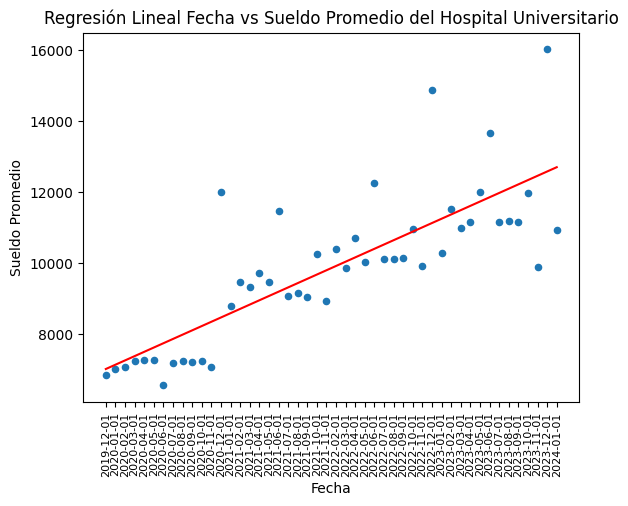

In [6]:
df_hosp = df.loc[df['Tipo'] == 'HOSPITAL'].groupby(["Fecha"])[["Sueldo Neto"]].agg({'Sueldo Neto': ['mean']})
df_hosp.reset_index(inplace=True)
df_hosp.columns = ['Fecha', 'sueldo_prom']
print_tabulate(df_hosp)
linear_regression(df_hosp, "Fecha", "sueldo_prom")

### Regresion Polinomial

In [7]:
def polynomial_regression(df: pd.DataFrame, x:str, y: str, degree:int) -> None:
    fixed_x = transform_variable(df, x)
    fixed_x = fixed_x.values.reshape(-1, 1)
    
    poly = PolynomialFeatures(degree=degree)
    fixed_x = poly.fit_transform(fixed_x)
    
    model = sm.OLS(df[y], fixed_x).fit()
    print(model.summary())

    coef = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]['coef']
    df.plot(x=x, y=y, kind='scatter')
    plt.plot(df[x], [sum(coef.values[i] * (x**i) for i in range(degree+1)) for x in fixed_x[:, 1]], color='red')
    plt.xticks(rotation=90, fontsize=8)  

    plt.title('Regresión Polinomial Fecha vs Sueldo Promedio del Hospital Universitario')
    plt.xlabel("Fecha")
    plt.ylabel("Sueldo Promedio")
    plt.show()

                            OLS Regression Results                            
Dep. Variable:            sueldo_prom   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     27.74
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           3.15e-10
Time:                        12:42:07   Log-Likelihood:                -409.65
No. Observations:                  48   AIC:                             827.3
Df Residuals:                      44   BIC:                             834.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6465.3611    687.864      9.399      0.0

C:\Users\HP\AppData\Local\Temp\ipykernel_14948\636184369.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]['coef']


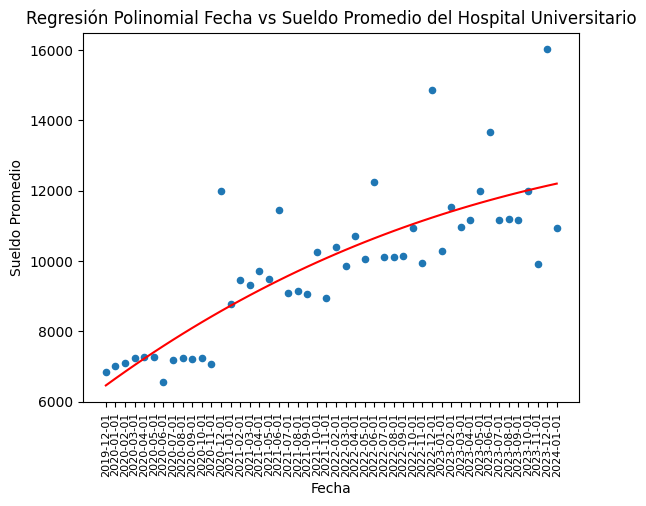

In [8]:
polynomial_regression(df_hosp, 'Fecha', 'sueldo_prom', 3)

### Regresión KNN

In [9]:
def change_variable(df: pd.DataFrame, x:str) -> np.ndarray:
    if isinstance(df[x][0], numbers.Number):
        return df[x].values
    else:
        return np.arange(len(df[x]))

In [10]:
def train_model(x,y,
                model_class:Union[type[KNeighborsRegressor], type[LinearRegression], type[Ridge], type[Lasso]],
                model_params: Dict[str, Any]) \
                ->Union[KNeighborsRegressor, LinearRegression, Ridge, Lasso]:
    print(f"Using {model_class.__name__} with {model_params}")
    model = model_class() if model_params is None or len(model_params)==0 else model_class(**model_params)
    trained_model = model.fit(x,y)
    return trained_model

In [11]:
def create_plot(subplots: int=111) -> Tuple[plt.Figure, plt.Axes]:
    fig = plt.figure()
    ax = fig.add_subplot(subplots)
    plt.xticks(rotation=90, fontsize=8)  
    plt.title('KNN Sueldo Promedio del Hospital Universitario')
    plt.xlabel("Fecha")
    plt.ylabel("Sueldo Promedio")
    return fig, ax

def plot_points(ax: Axes, x,y, scatter_params:Dict[str,Any]):
    return ax.scatter(x,y,**scatter_params)

def plot_line(ax: Axes,x,y,color,label='line'):
    return ax.plot(x,y,color=color, label=label)

In [12]:
def KNN_regression(df: pd.DataFrame, x:str, y:str, neighbors: List[int])->None:
    fixed_x = change_variable(df,x)
    fig, ax = create_plot()
    plot_points(ax, df[x], df[y], scatter_params={'marker':'.', 'c':'blue'})
    fixed_x = fixed_x.reshape(-1, 1)  # Ajuste para convertir fixed_x a dimensión 2
    for index, n_neighbors in enumerate(neighbors):
        trained_model = train_model(fixed_x, df[y], KNeighborsRegressor, {'n_neighbors': n_neighbors})
        plot_line(ax, df[x], trained_model.predict(fixed_x), color=f"C{index}", label=f"k{n_neighbors}")

        # Calcular R cuadrado manualmente
        y_pred = trained_model.predict(fixed_x)
        r2 = r2_score(df[y], y_pred)
        
        # Calcular R cuadrado ajustado
        n = len(df)
        p = 1  # Como estamos usando solo una variable x
        r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        print(f"R cuadrado ajustado (k{n_neighbors}): {r2_adjusted}")
    ax.legend(loc="upper left")

Using KNeighborsRegressor with {'n_neighbors': 1}
R cuadrado ajustado (k1): 1.0
Using KNeighborsRegressor with {'n_neighbors': 2}
R cuadrado ajustado (k2): 0.7701920555526136
Using KNeighborsRegressor with {'n_neighbors': 4}
R cuadrado ajustado (k4): 0.6876218440739846
Using KNeighborsRegressor with {'n_neighbors': 10}
R cuadrado ajustado (k10): 0.6505792571489859


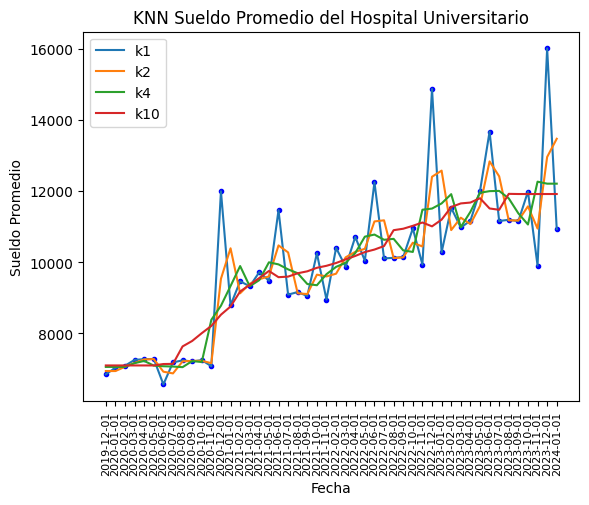

In [13]:
KNN_regression(df_hosp, "Fecha", "sueldo_prom",[1,2,4,10])

Comparando la R ajustada de los modelos, se concluye que el mejor modelo es KNN con k=2.\
Se tiene un 77.02 %